## **<center>  Redes Neuronales y Deep Learning </center>**
***********************************************

### Nombre y Apellido: **RUBEN ADRIAN BAQUEL**
***********************************************




-----
### <center> **ESTRATEGIA I - Red Pre -Entrenada** </center>
----

In [ ]:
################################################################################
## Montamos el Drive 
################################################################################

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
################################################################################
# Adaptamos nuestro directorio
################################################################################
!ls -lai '/content/drive/MyDrive/Colab Notebooks/Actividad'

total 3511724
39 -rw------- 1 root root      23586 Mar 16 03:23 07MAIR_13-03.ipynb
38 -rw------- 1 root root      19630 Apr 18  2019 pickle_all_classes.pickle
37 -rw------- 1 root root 3595960486 Apr 18  2019 pickle_all_images_df.pickle


In [ ]:
################################################################################
# La utilizacion de un directorio base es obligatoria
# Todas las referencias al disco duro (guardar o cargar) deberan tener esta variable como base
################################################################################

BASE_FOLDER = '/content/drive/MyDrive/Colab Notebooks/Actividad/'

In [ ]:
###############################################################################
## Librerias para Visualizar la disponibilidad de memoria RAM
###############################################################################
!pip install gputil
!pip install psutil
!pip install humanize

In [ ]:
###############################################################################
## Librerias a utilizar en una primer parte
###############################################################################
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tarfile
import pickle
from keras.utils import to_categorical
%matplotlib inline

import humanize
import psutil
import GPUtil as GPU
import warnings
warnings.filterwarnings('ignore')

In [ ]:
################################################################################
## Disponibilidad RAM
################################################################################

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def getRam_y_Gpu(imprimir=False):
  process = psutil.Process(os.getpid())
  ram_available = psutil.virtual_memory().available
  ram_disponible = humanize.naturalsize( ram_available  )
  gpu_disponible = gpu.memoryFree
  if imprimir:
      print("Gen RAM Free: " + ram_disponible, " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
      print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu_disponible, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
  ram_available = ram_available / 1000000000
  ram_available = round(ram_available, 2)
  return (ram_available, gpu_disponible)

ramColab, GpuColab = getRam_y_Gpu(True)

Gen RAM Free: 12.6 GB  | Proc size: 355.1 MB
GPU RAM Free: 15109MB | Used: 0MB | Util   0% | Total 15109MB


In [ ]:
###################################################################################################
## DESCARGAMOS Y DESCOMPRIMIMOS EL DATASET CALTECH_PREPROCESADO DEL DRIVE
###################################################################################################

with open(BASE_FOLDER+"pickle_all_images_df.pickle", "rb") as input_file:
#with open(BASE_FOLDER+"pickle_all_images_df-001.pickle", "rb") as input_file:

    x_train = pickle.load(input_file)
with open(BASE_FOLDER+"pickle_all_classes.pickle", "rb") as input_file:
    y_train = pickle.load(input_file)

In [ ]:
## Visualiamos la memoria RAM disponible luego de descargar el dataset:
ramColab, GpuColab = getRam_y_Gpu(True)

Gen RAM Free: 8.6 GB  | Proc size: 7.6 GB
GPU RAM Free: 15109MB | Used: 0MB | Util   0% | Total 15109MB


**-Observando el dataset:**

In [ ]:
## Shape X_train Y_train:
print('x_train:',x_train.shape)
print('')
print('y_train:',len(y_train))

x_train: (9145, 128, 128, 3)

y_train: 9145


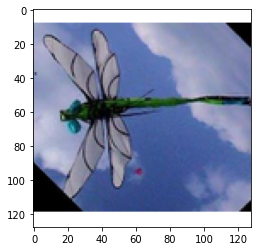

In [ ]:
## Show image[3126]
imgplot = plt.imshow(x_train[3126])
plt.show()

In [ ]:
## label[3126]
print('label[3126] :',y_train[3126])

label[3126] : dragonfly


In [ ]:
## labels:
labels = np.unique(y_train)
print(labels)

['BACKGROUND_Google' 'Faces' 'Faces_easy' 'Leopards' 'Motorbikes'
 'accordion' 'airplanes' 'anchor' 'ant' 'barrel' 'bass' 'beaver'
 'binocular' 'bonsai' 'brain' 'brontosaurus' 'buddha' 'butterfly' 'camera'
 'cannon' 'car_side' 'ceiling_fan' 'cellphone' 'chair' 'chandelier'
 'cougar_body' 'cougar_face' 'crab' 'crayfish' 'crocodile'
 'crocodile_head' 'cup' 'dalmatian' 'dollar_bill' 'dolphin' 'dragonfly'
 'electric_guitar' 'elephant' 'emu' 'euphonium' 'ewer' 'ferry' 'flamingo'
 'flamingo_head' 'garfield' 'gerenuk' 'gramophone' 'grand_piano'
 'hawksbill' 'headphone' 'hedgehog' 'helicopter' 'ibis' 'inline_skate'
 'joshua_tree' 'kangaroo' 'ketch' 'lamp' 'laptop' 'llama' 'lobster'
 'lotus' 'mandolin' 'mayfly' 'menorah' 'metronome' 'minaret' 'nautilus'
 'octopus' 'okapi' 'pagoda' 'panda' 'pigeon' 'pizza' 'platypus' 'pyramid'
 'revolver' 'rhino' 'rooster' 'saxophone' 'schooner' 'scissors' 'scorpion'
 'sea_horse' 'snoopy' 'soccer_ball' 'stapler' 'starfish' 'stegosaurus'
 'stop_sign' 'strawberry'

In [ ]:
#########################################################################
### Transformando las labels de texto a valores numéricos 
#########################################################################

def convertLabelsToNumbers(y_train):
  y = np.unique(y_train)
  mapping = { key : value for key,value in zip(y,range(len(y)))}
  processed_y = np.array([mapping[i] for i in y_train])
  return processed_y

processed_y = convertLabelsToNumbers(y_train)
y_labels = to_categorical(processed_y)

In [ ]:
## Categorias Unicas:
classImageGenerator = np.unique(y_labels)
nclassImageGenerator = len(y_labels[1])
print('Categorias unicas:',nclassImageGenerator)

Categorias unicas: 102


In [ ]:
## label[3126]
print('y_value[3126]:',y_labels[3126])

y_value[3126]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [ ]:
## N° Clases:
classes = np.unique(processed_y)
nClasses = len(classes)
print(nClasses)

102


**-Dividimos el datset en train y test**

In [ ]:
###################################################################################################
## SPLIT en train y test
###################################################################################################

from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(x_train,y_labels, test_size=0.25, random_state=42)

##TAMAÑO DE LOS CONJUNTOS DE TRAIN Y TEST:
print('-----------------------------------------------------------------------')
print('tamaños datasets:')
print('x_train:',X_train.shape)
print('y_train:',Y_train.shape)
print('')
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)
print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
tamaños datasets:
x_train: (6858, 128, 128, 3)
y_train: (6858, 102)

x_test: (2287, 128, 128, 3)
y_test: (2287, 102)
-----------------------------------------------------------------------


In [ ]:
## Eliminamos variables que no usaremos para disponer de memoria:

del x_train
del y_labels

**- Inspeccionando el conjunto de datos**

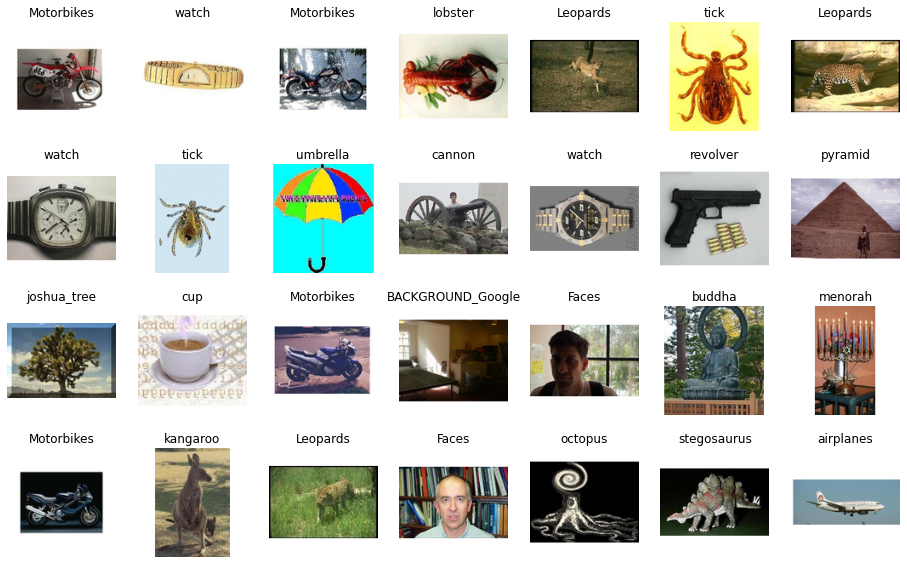

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = X_train[n]
    plt.imshow(img)
    plt.title(labels[Y_train[n].argmax(axis=0)])
    plt.axis('off')   

### **-REDUCIREMOS OVERFITTING MEDIANTE DATA AUGMENTATION**

La idea al momento de crear una red capaz de predecir las imágenes con las cuales se va encontrando es que la cantidad de datos/instancias sea un número importante para tener la capacidad de separar a los datos en instancias de entrenamiento, prueba y validación. En nuestro caso se disponen de un total de 9145 instancias las cuales fueron divididas en 6858 instancias de training y 2287 para prueba. Por tal motivo vamos a utilizar las posibilidades que nos brindan algunos paquetes para mejorar la capacidad de rendimiento de nuestro modelo a través de un aumento en los datos que ya disponemos usando lo que se conoce como [DataAugmentation](https://towardsdatascience.com/data-augmentation-for-deep-learning-4fe21d1a4eb9).

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.applications import imagenet_utils

In [ ]:
################################################################################
##Creando un contenedor DataGenerator para el aumento automático de muestras####
################################################################################

datagen = ImageDataGenerator(rotation_range=20,   # indica el rango dentro del cual se pueden rotar imágenes al azar
                         width_shift_range=.20,   # rangos dentro de los cuales se pueden trasladar las imágenes al azar verticalmente u horizontalmente
                         height_shift_range=.20,
                         shear_range = 0.15,      # sirve para aplicar transformaciones de corte al azar
                         horizontal_flip =True,   # voltear aleatoriamente la mitad de las imágenes horizontalmente
                         zoom_range=0.1,          # sirve para aplicar zoomaleatorio dentro de las imágenes
                         fill_mode='nearest',     # es la estrategia utilizada para rellenar los píxeles recién creados
                         validation_split = 0.2)  # set de validacion

Usamos el **validation_split** con la idea de tener un conjunto de validacion que nos permira monitorear el overfifting.

**- Inspeccionando las muestras generadas sintéticamente**

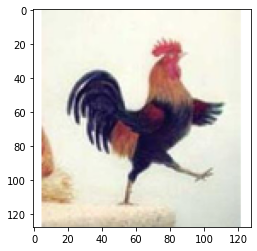

Label = rooster


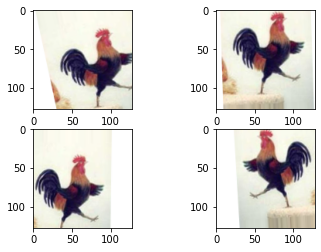

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

sample = 5662
plt.imshow(image.array_to_img(X_train[sample]))
plt.show()
print('Label = {}'.format(labels[Y_train[sample].argmax(axis=0)]))
#print('Label = {}'.format(Y_train[sample].argmax(axis=0)))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(X_train[sample].reshape((1,128,128,3)),batch_size=1):
    #plt.figure(i)
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

Podemos ver las nuevas imagenes generadas del **ImageDataGenerator**. La idea es utilizar estas imagenes durante la etapa del entrenamiento que nos permita disponer de una cantidad superior a las disponibles. De esta manera podemos controlar mejor la posbilidad de sobreajuste.

**-Preprocesado**

In [ ]:
## Deshacemos la normalizacion para adaptar a ImageNet:
X_train*=255.0
x_test*=255.0

## Por si es necesario convertir a one-hot encoding:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
y_test = lb.transform(y_test)

## IMPORTANTE: Se normalizan los datos como se normalizaron en el entrenamiento con ImageNet!!
X_train = imagenet_utils.preprocess_input(X_train)
x_test = imagenet_utils.preprocess_input(x_test)

In [ ]:
## Importamos las librerias necesarias para esta sección:
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop, Adagrad
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive

**-Comenzamos probando las arquitecturas propuestas que se adapten a nuestro data set**

**-VGG16**

Como primer arquitectura a utilizar y probar hemos seleccionado la **[VGG16](https://keras.io/api/applications/vgg/#vgg16-function)**, una red convolucional profunda para el reconociento de imagenes a gran escala.

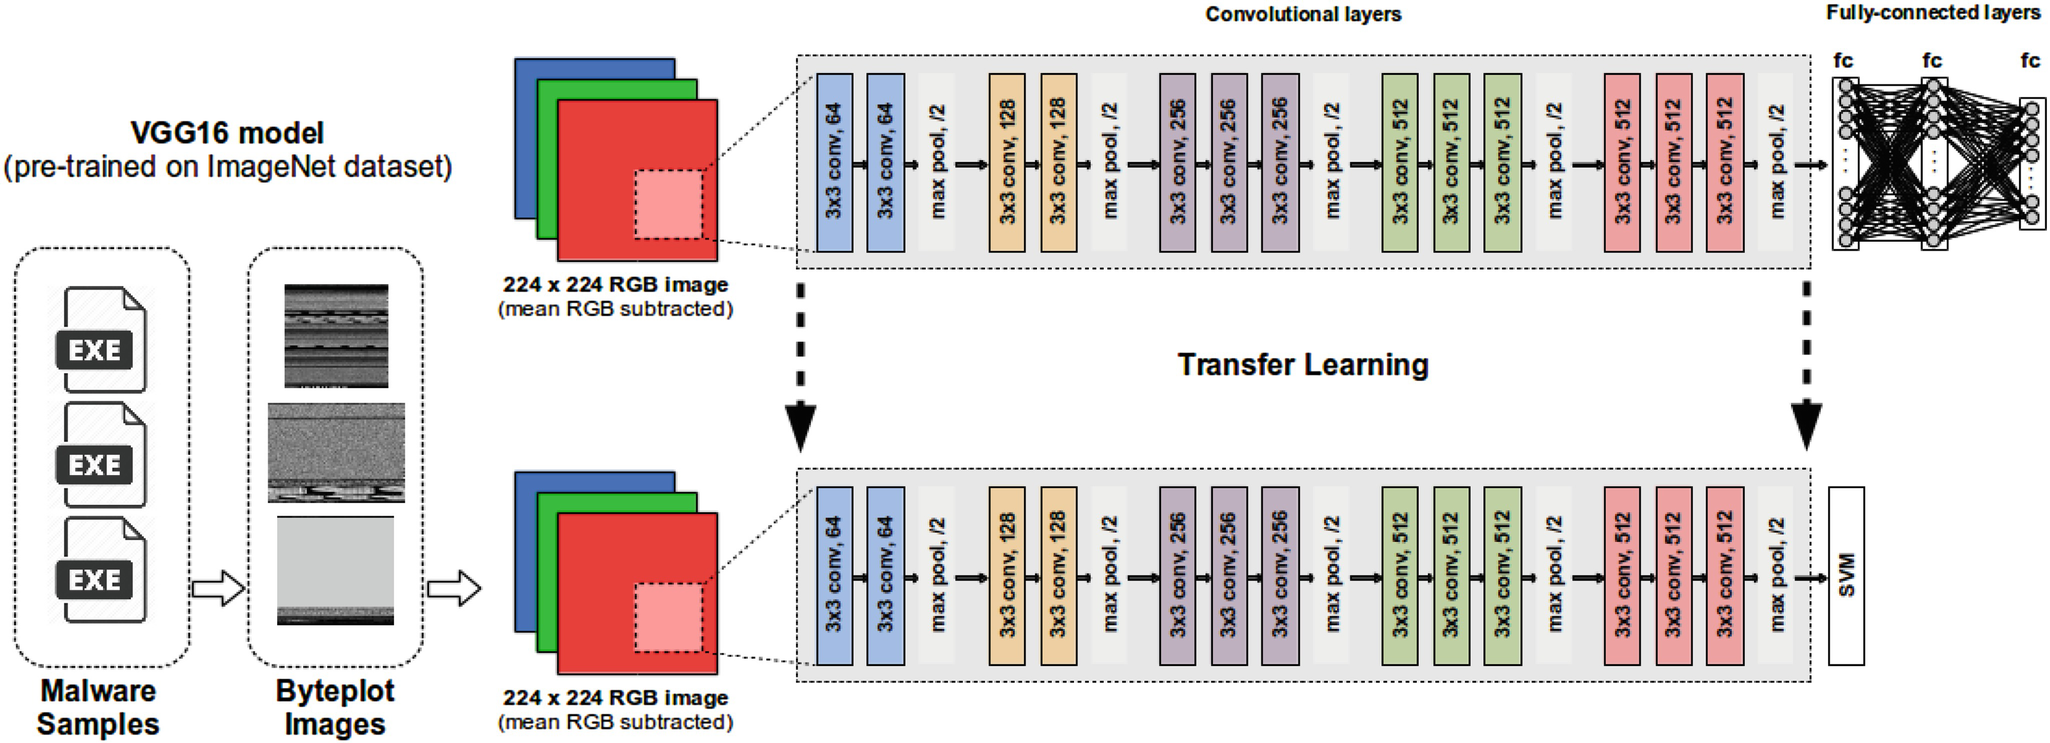

In [ ]:
###################################################################################################
# ARQUITECTURA VGG16
###################################################################################################
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet',
                 include_top=False, # No incluir el top model, i.e. la parte densa destinada a la clasificación (fully connected layers)
                 input_shape=(128,128,3))
base_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
______________________________________________________________

Vemos que la arquitectura de la **VGG16** en su base model tiene un total de 14.714.688 parámetros.

**- Creando el top model y congelando TODAS las capas convolucionales (TRANSFER LEARNING)**

In [ ]:
# conectarlo a nueva parte densa
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
model_VG16 = Sequential()
model_VG16.add(base_model)
model_VG16.add(layers.Flatten())
model_VG16.add(layers.Dense(256, activation='relu'))
model_VG16.add(layers.Dense(nClasses, activation='softmax'))

model_VG16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 102)               26214     
Total params: 16,838,310
Trainable params: 2,123,622
Non-trainable params: 14,714,688
_________________________________________________________________


Congelando las capas convolucionales, nuestro top model de la arquitectura VGG16 se queda con 2.123.622 parametros entrenables.

**-Entrenando la solucion**

Recordar que cuando compilamos nuestro modelo establecemos los hiperparámetros. En nuestro caso usamos un optimizador **Adam** con una learning rate de 0.0005 que fue la que mejor se estuvo adaptando a las distintas pruebas realizadas. 

La funcion de pérdida es una **categorial_crossentropy** dado que las instancias output fueron procesadas a traves de un One-Hot-Encoding.

Posterior al entrenamiento guardamos el train en un histórico que nos permita plotear el valor de pérdida en validación por cada época, el accuracy en train por cada época y el accuracy en validation por cada época. 

In [ ]:
## Compilamos el modelo:
print("[INFO]: Compilando el modelo...")
model_VG16.compile(loss="categorical_crossentropy",
                          optimizer=Adam(lr=0.0005,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
                          metrics=["accuracy"]) 

print("[INFO]: Modelo compilado...")

## Entrenamiento de la red:
print("[INFO]: Entrenando la red...")
H_VG16 = model_VG16.fit(datagen.flow(X_train,Y_train,batch_size=128,subset='training'),
                              steps_per_epoch= int(len(X_train)*2)/128,epochs = 50,
                              validation_data = datagen.flow(X_train,Y_train,batch_size=128,subset='validation'),workers=2)

[INFO]: Compilando el modelo...
[INFO]: Modelo compilado...
[INFO]: Entrenando la red...
Epoch 1/50
107/107 [==============================] - 96s 532ms/step - loss: 6.6124 - accuracy: 0.3874 - val_loss: 1.7329 - val_accuracy: 0.6338
Epoch 2/50
107/107 [==============================] - 51s 474ms/step - loss: 1.2788 - accuracy: 0.7129 - val_loss: 1.3420 - val_accuracy: 0.7155
Epoch 3/50
107/107 [==============================] - 52s 473ms/step - loss: 0.8349 - accuracy: 0.8058 - val_loss: 1.2939 - val_accuracy: 0.7491
Epoch 4/50
107/107 [==============================] - 52s 474ms/step - loss: 0.5433 - accuracy: 0.8685 - val_loss: 1.4314 - val_accuracy: 0.7542
Epoch 5/50
107/107 [==============================] - 52s 475ms/step - loss: 0.4096 - accuracy: 0.8923 - val_loss: 1.2377 - val_accuracy: 0.7848
Epoch 6/50
107/107 [==============================] - 52s 475ms/step - loss: 0.3423 - accuracy: 0.9122 - val_loss: 1.4770 - val_accuracy: 0.7753
Epoch 7/50
107/107 [=====================

**-Evaluacion y ploteo**

[INFO]: Evaluando el modelo...
                   precision    recall  f1-score   support

BACKGROUND_Google       0.69      0.70      0.70       122
            Faces       0.99      0.99      0.99        98
       Faces_easy       0.99      0.98      0.99       109
         Leopards       0.72      1.00      0.84        38
       Motorbikes       0.97      1.00      0.99       181
        accordion       0.89      1.00      0.94        17
        airplanes       0.99      0.97      0.98       211
           anchor       0.67      0.22      0.33         9
              ant       0.33      1.00      0.50         4
           barrel       0.85      0.79      0.81        14
             bass       0.73      0.67      0.70        12
           beaver       0.62      0.71      0.67        14
        binocular       0.67      0.73      0.70        11
           bonsai       0.85      0.88      0.86        32
            brain       0.96      0.87      0.92        31
     brontosaurus       

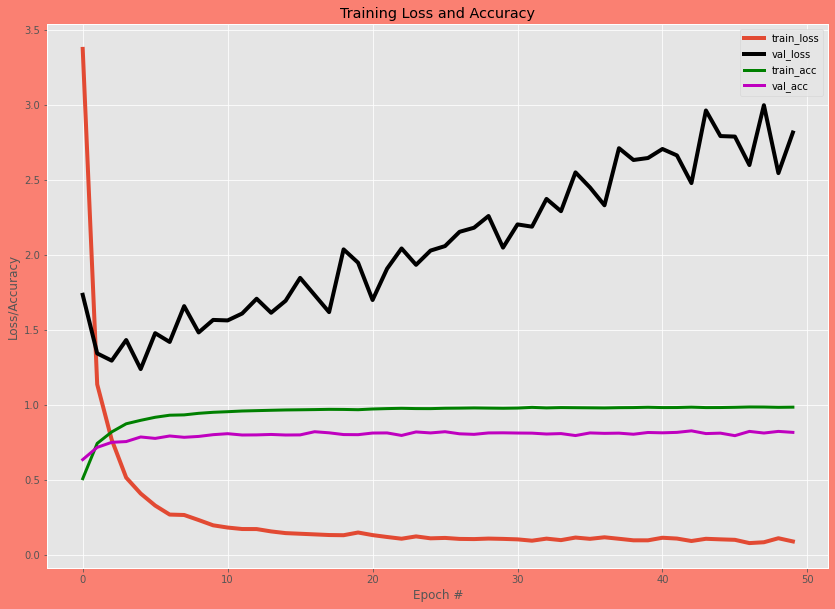

In [ ]:
## Evaluación del modelo
print("[INFO]: Evaluando el modelo...")

## Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_VG16.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels)) 

# Plot
plt.style.use("ggplot")
plt.figure(figsize=(14,10),facecolor='Salmon')
plt.plot(np.arange(0, 50), H_VG16.history["loss"], label="train_loss", linewidth=4)
plt.plot(np.arange(0, 50), H_VG16.history["val_loss"], label="val_loss", color='k', linewidth=4)
plt.plot(np.arange(0, 50), H_VG16.history["accuracy"], label="train_acc", linewidth=3, color='green')
plt.plot(np.arange(0, 50), H_VG16.history["val_accuracy"], label="val_acc", linewidth=3, color='m')
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

* Se utiliza la puntuación de **macro avg** cuando todas las clases deban tratarse por igual para evaluar el rendimiento general del clasificador con respecto a las etiquetas de clase más frecuentes.
* Se utiliza una puntuación de **weighted avg** en caso de desequilibrios de clase (diferente número de instancias relacionadas con diferentes etiquetas de clase).

En nuestro caso al tener un dataset con distintas instancias, nos quedamos con el **Accuracy weighted avg 86%**.

Como se puede apreciar en la curva de perdida en validación, existe una marcada tendencia en donde la curva se incrementa en vez de reducir, eso es porque no hay ninguna capacidad de aprendizaje en el modelo, por lo tanto se intentará mejorar esa capacidad usando **Fine Tuning**.

In [ ]:
## Vemos la evaluacion del modelo comparando con los sets de test:
eval_VG16 = model_VG16.evaluate(x_test,y_test,verbose=0)
print('loss test:', round(eval_VG16[0],3))
print('accuracy test:', round(eval_VG16[1]*100,1),'%')

loss test: 2.482
accuracy test: 85.2 %


Hemos finalizado la evaluación de la arquitectura **VGG16** con un accuracy del 85.2%.

**-FINE TUNING**

**¿Por qué usar fine-tuning?**

El motivo principal para usar fine-tuning es el ahorro en recursos de computación y tiempo, pues evitamos la mayor parte del entrenamiento.
Si disponemos de acceso a una red pre-entrenada que resuelva un problema similar al que queremos resolver, podemos usar esa red como punto de partida (transfer learning). Simplemente la adaptamos a nuestro problema y continuamos entrenando con nuestros datos. La red ya ha aprendido a extraer las características universales necesarias, por lo que la mayor parte del trabajo ya está hecho.

**- Creando el top model y descongelando bloques convolucionales (FINE TUNING)**

In [ ]:
datagen_FT = ImageDataGenerator(rotation_range=40,   # indica el rango dentro del cual se pueden rotar imágenes al azar
                         width_shift_range=.20,   # rangos dentro de los cuales se pueden trasladar las imágenes al azar verticalmente u horizontalmente
                         height_shift_range=.20,
                         horizontal_flip =True,   # voltear aleatoriamente la mitad de las imágenes horizontalmente
                         zoom_range=0.2,          # sirve para aplicar zoomaleatorio dentro de las imágenes
                         fill_mode='nearest',     # es la estrategia utilizada para rellenar los píxeles recién creados
                         validation_split = 0.2)

In [ ]:
## Deshacemos la normalizacion para adaptar a ImageNet:
X_train*=255.0
x_test*=255.0

## Por si es necesario convertir a one-hot encoding:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
y_test = lb.transform(y_test)

# IMPORTANTE: Se normalizan los datos como se normalizaron en el entrenamiento con ImageNet!!
X_train = imagenet_utils.preprocess_input(X_train)
x_test = imagenet_utils.preprocess_input(x_test)

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
## Definimos dimensiones de nuestros datos de entrada y las categorias de las clases:
input_shape = (128, 128, 3) 
labelNames = labels

## Importamos VGG16 con pesos de imagenet y sin top_model especificando tamaño de entrada de datos
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
# Mostramos la arquitectura
base_model.summary()

# Congelamos las capas de los 4 primeros bloques convolucionales, en adelante se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa
for layer in base_model.layers: 
  if layer.name == 'block5_conv1': 
    break 
  layer.trainable = False 
  print('Capa ' + layer.name + ' congelada...')

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

Le agregamos dos capas de batch normalization a nuestro modelo para mejorar su performence, lo hacemos a continuación de las funciones de activación.

**Batch Normalization** es una técnica diseñada para estandarizar automáticamente las entradas a una capa en una red neuronal de aprendizaje profundo.

Una vez implementada, la normalización por lotes tiene el efecto de acelerar drásticamente el proceso de entrenamiento de una red neuronal y, en algunos casos, mejora el rendimiento del modelo a través de un efecto de regularización modesto.

In [ ]:
## Cogemos las últimas capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output 
x = Flatten()(last) 
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dropout(0.25)(x) 
x = Dense(256, activation='relu', name='fc2')(x) 
x = Dense(nClasses, activation='softmax', name='predictions')(x) 
model = Model(base_model.input, x) 

# Compilamos el modelo
model.compile(loss = 'categorical_crossentropy',
              optimizer=Adam(lr=0.00005,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-09),
              metrics=['accuracy']) 
#model.compile(optimizer=SGD(learning_rate=0.0005), loss = 'categorical_crossentropy', metrics=['accuracy']) 


# Vamos a visualizar el modelo prestando especial atención en el número de pesos total y el número de pesos entrenables.
model.summary()

print('')
print('[INFO]: Entrenando el modelo...')
# Entrenamos el modelo
H_FT16 = model.fit(datagen_FT.flow(X_train,Y_train,batch_size=128,subset='training'),
                              steps_per_epoch= int(len(X_train)*2)/128,epochs = 50,
                              validation_data = datagen_FT.flow(X_train,Y_train,batch_size=128,subset='validation'),workers=2)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

Como se puede observar, la arquitectura **VGG16** con el **Fine Tuning** goza de un total de 15.757.670 parámetros entrenables.

[INFO]: Evaluando el modelo...
                   precision    recall  f1-score   support

BACKGROUND_Google       0.70      0.73      0.71       122
            Faces       0.99      0.99      0.99        98
       Faces_easy       0.99      0.99      0.99       109
         Leopards       0.69      1.00      0.82        38
       Motorbikes       0.98      0.99      0.99       181
        accordion       0.84      0.94      0.89        17
        airplanes       0.99      0.99      0.99       211
           anchor       0.80      0.44      0.57         9
              ant       0.50      0.75      0.60         4
           barrel       1.00      0.64      0.78        14
             bass       0.77      0.83      0.80        12
           beaver       0.67      0.57      0.62        14
        binocular       1.00      0.36      0.53        11
           bonsai       0.82      0.97      0.89        32
            brain       0.87      0.87      0.87        31
     brontosaurus       

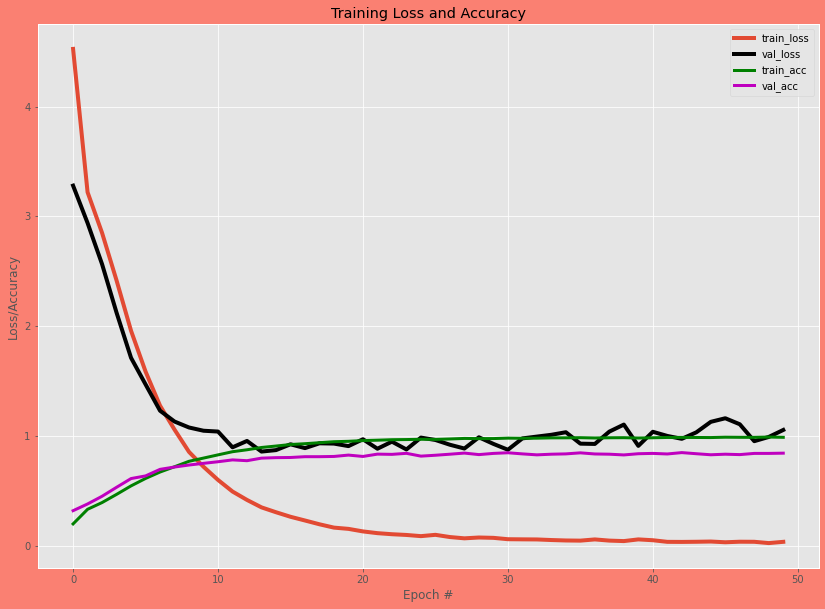

In [ ]:
## Evaluación del modelo
print("[INFO]: Evaluando el modelo...")

## Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels)) 

# Plot
plt.style.use("ggplot")
plt.figure(figsize=(14,10),facecolor='Salmon')
plt.plot(np.arange(0, 50), H_FT16.history["loss"], label="train_loss", linewidth=4)
plt.plot(np.arange(0, 50), H_FT16.history["val_loss"], label="val_loss", color='k', linewidth=4)
plt.plot(np.arange(0, 50), H_FT16.history["accuracy"], label="train_acc", linewidth=3, color='green')
plt.plot(np.arange(0, 50), H_FT16.history["val_accuracy"], label="val_acc", linewidth=3, color='m')
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Hemos reducido en parte el overfifting observado durante la etapa anterior. Aún así, estamos lejos de que la tendencia de la curva en pérdida de validación se acerque a la curva de pérdida en entrenamiento.

In [ ]:
## Vemos la evaluacion del modelo comparando con los sets de test:
eval_FT16 = model.evaluate(x_test,y_test,verbose=0)
print('loss test:', round(eval_FT16[0],3))
print('accuracy test:', round(eval_FT16[1]*100,1),'%')

loss test: 1.12
accuracy test: 86.4 %


Finalizamos con un accuracy en test del 86.4%.

La segunda arquitectura seleccionada es la **ResNet50.**

-**RESNET50**

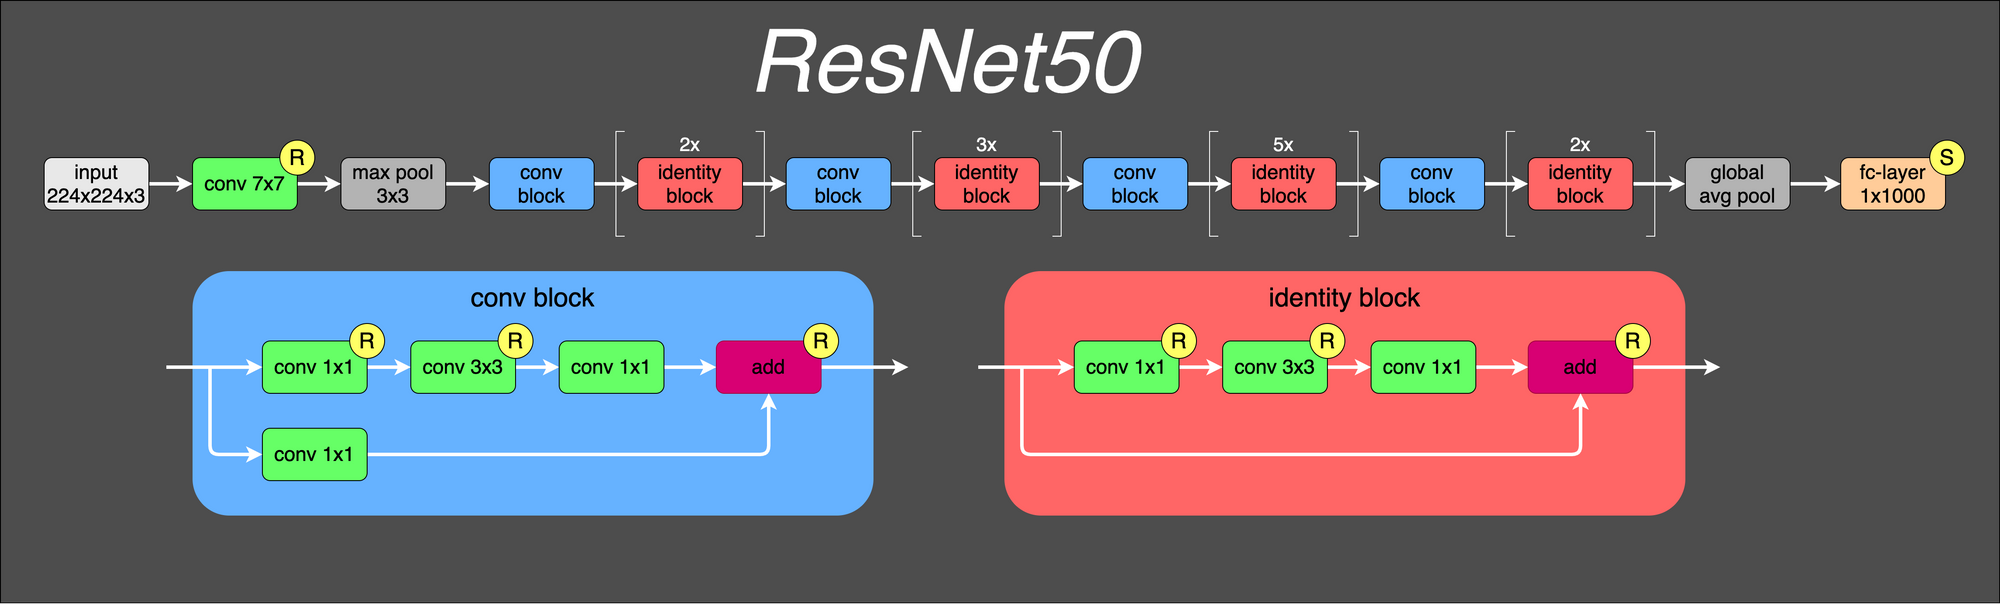

El modelo **ResNet-50** consta de 5 etapas, cada una con un bloque de convolución y de identidad. Cada bloque de convolución tiene 3 capas de convolución y cada bloque de identidad también tiene 3 capas de convolución. El **ResNet-50** tiene más de 23 millones de parámetros entrenables.

In [ ]:
################################################################################
############# ImageDataGenerator ###############################################

datagen_FT = ImageDataGenerator(rotation_range=40,   # indica el rango dentro del cual se pueden rotar imágenes al azar
                         width_shift_range=.20,   # rangos dentro de los cuales se pueden trasladar las imágenes al azar verticalmente u horizontalmente
                         height_shift_range=.20,
                         horizontal_flip =True,   # voltear aleatoriamente la mitad de las imágenes horizontalmente
                         zoom_range=0.2,          # sirve para aplicar zoomaleatorio dentro de las imágenes
                         fill_mode='nearest',     # es la estrategia utilizada para rellenar los píxeles recién creados
                         validation_split = 0.2)

In [ ]:
###################################################################################################
# ARQUITECTURA RESNET 50
###################################################################################################
from keras.applications import ResNet50

base_model = ResNet50(weights='imagenet',
                 include_top=False, # No incluir el top model, i.e. la parte densa destinada a la clasificación (fully connected layers)
                 input_shape=(128,128,3))
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

Se puede ver la enorme arquitectura que tiene una **ResNet50** con sus 23.587.712 parámetros.

**- Creando el top model y congelando TODAS las capas convolucionales (TRANSFER LEARNING)**

In [ ]:
###################### TRANSFER LEARNING #######################################
## conectarlo a nueva parte densa
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
model_R50 = Sequential()
model_R50.add(base_model)
model_R50.add(layers.Flatten())
model_R50.add(layers.Dense(256, activation='relu'))
model_R50.add(layers.Dense(nClasses, activation='softmax'))

model_R50.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               8388864   
_________________________________________________________________
dense_1 (Dense)              (None, 102)               26214     
Total params: 32,002,790
Trainable params: 8,415,078
Non-trainable params: 23,587,712
_________________________________________________________________


**-Entrenando la red**

In [ ]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_R50.compile(loss="categorical_crossentropy",
                          optimizer=Adam(lr=0.00005,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
                          metrics=["accuracy"]) 

print("[INFO]: Modelo compilado...")

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_R50 = model_R50.fit(datagen_FT.flow(X_train,Y_train,batch_size=128,subset='training'),
                              steps_per_epoch= int(len(X_train)*0.8)/128,epochs = 50,
                              validation_data = datagen_FT.flow(X_train,Y_train,batch_size=128,subset='validation'))

[INFO]: Compilando el modelo...
[INFO]: Modelo compilado...
[INFO]: Entrenando la red...
Epoch 1/50
42/42 [==============================] - 63s 642ms/step - loss: 4.4083 - accuracy: 0.2385 - val_loss: 2.1996 - val_accuracy: 0.5244
Epoch 2/50
42/42 [==============================] - 25s 581ms/step - loss: 1.9656 - accuracy: 0.5678 - val_loss: 1.4949 - val_accuracy: 0.6492
Epoch 3/50
42/42 [==============================] - 25s 577ms/step - loss: 1.2572 - accuracy: 0.7028 - val_loss: 1.2494 - val_accuracy: 0.7002
Epoch 4/50
42/42 [==============================] - 25s 579ms/step - loss: 0.9646 - accuracy: 0.7591 - val_loss: 1.0487 - val_accuracy: 0.7520
Epoch 5/50
42/42 [==============================] - 25s 583ms/step - loss: 0.8007 - accuracy: 0.7911 - val_loss: 0.9828 - val_accuracy: 0.7724
Epoch 6/50
42/42 [==============================] - 25s 582ms/step - loss: 0.6674 - accuracy: 0.8223 - val_loss: 1.0130 - val_accuracy: 0.7644
Epoch 7/50
42/42 [==============================] - 2

**-Evaluacion y ploteo**

[INFO]: Evaluando el modelo...
                   precision    recall  f1-score   support

BACKGROUND_Google       0.71      0.67      0.69       122
            Faces       0.96      0.99      0.97        98
       Faces_easy       0.99      0.99      0.99       109
         Leopards       0.79      1.00      0.88        38
       Motorbikes       0.99      0.99      0.99       181
        accordion       0.89      1.00      0.94        17
        airplanes       0.98      0.98      0.98       211
           anchor       0.50      0.56      0.53         9
              ant       0.33      0.75      0.46         4
           barrel       0.92      0.79      0.85        14
             bass       0.60      0.50      0.55        12
           beaver       0.71      0.71      0.71        14
        binocular       0.90      0.82      0.86        11
           bonsai       0.94      0.91      0.92        32
            brain       0.90      0.84      0.87        31
     brontosaurus       

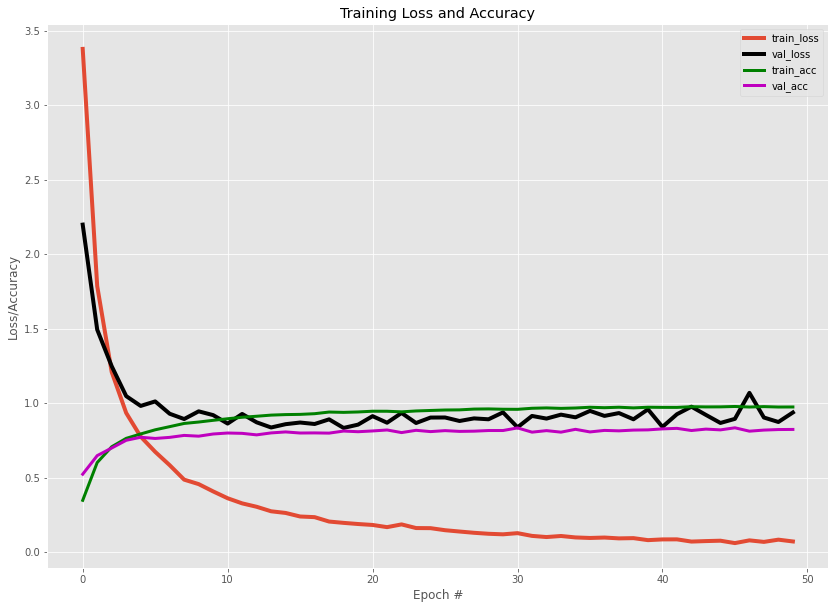

In [ ]:
## Evaluación del modelo
print("[INFO]: Evaluando el modelo...")

## Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_R50.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels)) 

# Plot
plt.style.use("ggplot")
plt.figure(figsize=(14,10))
plt.plot(np.arange(0, 50), H_R50.history["loss"], label="train_loss", linewidth=4)
plt.plot(np.arange(0, 50), H_R50.history["val_loss"], label="val_loss", color='k', linewidth=4)
plt.plot(np.arange(0, 50), H_R50.history["accuracy"], label="train_acc", linewidth=3, color='green')
plt.plot(np.arange(0, 50), H_R50.history["val_accuracy"], label="val_acc", linewidth=3, color='m')
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

En el caso de la arquitectura **ResNet50** se alcanza un **weighted avg** del 88%, el cual presenta menor Overfifting en comparación a la **VGG16**. Por lo tanto, de las dos arquitecturas nos quedamos con la **ResNet50** ya que se obtiene una precision más alta.

In [ ]:
## Vemos la evaluacion del modelo comparando con los sets de test:
eval_R50 = model_R50.evaluate(x_test,y_test,verbose=0)
print('loss test:', round(eval_R50[0],3))
print('accuracy test:', round(eval_R50[1]*100,1),'%')

loss test: 0.589
accuracy test: 87.4 %


En test, se alcanza un accuracy del 87.4% con la **ResNet50**.

**-FINE TUNING**

Al igual que lo hecho con la arquitectura VGG16, buscaremos ver la posibilidad de reducir el overfitting a traves del procedimiento del Fine Tuning.

In [ ]:
## Definimos dimensiones de nuestros datos de entrada y las categorias de las clases:
input_shape = (128, 128, 3) 
labelNames = labels

## Importamos ResNet50 con pesos de imagenet y sin top_model especificando tamaño de entrada de datos
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
# Mostramos la arquitectura
base_model.summary()

# Congelamos las capas de los 4 primeros bloques convolucionales, en adelante se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa
for layer in base_model.layers: 
  if layer.name == 'conv5_block1_1_conv': 
    break 
  layer.trainable = False 
  print('Capa ' + layer.name + ' congelada...')

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
## Cogemos las últimas capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output 
x = Flatten()(last) 
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dropout(0.25)(x) 
x = Dense(256, activation='relu', name='fc2')(x) 
x = Dense(nClasses, activation='softmax', name='predictions')(x) 
model = Model(base_model.input, x) 

# Compilamos el modelo
model.compile(loss = 'categorical_crossentropy',
              optimizer=Adam(lr=0.00005,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-09),
              metrics=['accuracy']) 
#model.compile(optimizer=SGD(learning_rate=0.0005), loss = 'categorical_crossentropy', metrics=['accuracy']) 


# Vamos a visualizar el modelo prestando especial atención en el número de pesos total y el número de pesos entrenables.
model.summary()

print('')
print('[INFO]: Entrenando el modelo...')
# Entrenamos el modelo
H_FTR50 = model.fit(datagen_FT.flow(X_train,Y_train,batch_size=128,subset='training'),
                              steps_per_epoch= int(len(X_train)*2)/128,epochs = 50,
                              validation_data = datagen_FT.flow(X_train,Y_train,batch_size=128,subset='validation'),workers=2)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

[INFO]: Evaluando el modelo...
                   precision    recall  f1-score   support

BACKGROUND_Google       0.75      0.72      0.73       122
            Faces       0.99      0.99      0.99        98
       Faces_easy       0.99      0.99      0.99       109
         Leopards       0.95      0.97      0.96        38
       Motorbikes       0.99      0.99      0.99       181
        accordion       0.89      1.00      0.94        17
        airplanes       0.99      1.00      0.99       211
           anchor       0.67      0.67      0.67         9
              ant       0.57      1.00      0.73         4
           barrel       0.93      0.93      0.93        14
             bass       0.78      0.58      0.67        12
           beaver       0.56      0.71      0.63        14
        binocular       0.88      0.64      0.74        11
           bonsai       0.89      0.97      0.93        32
            brain       1.00      0.84      0.91        31
     brontosaurus       

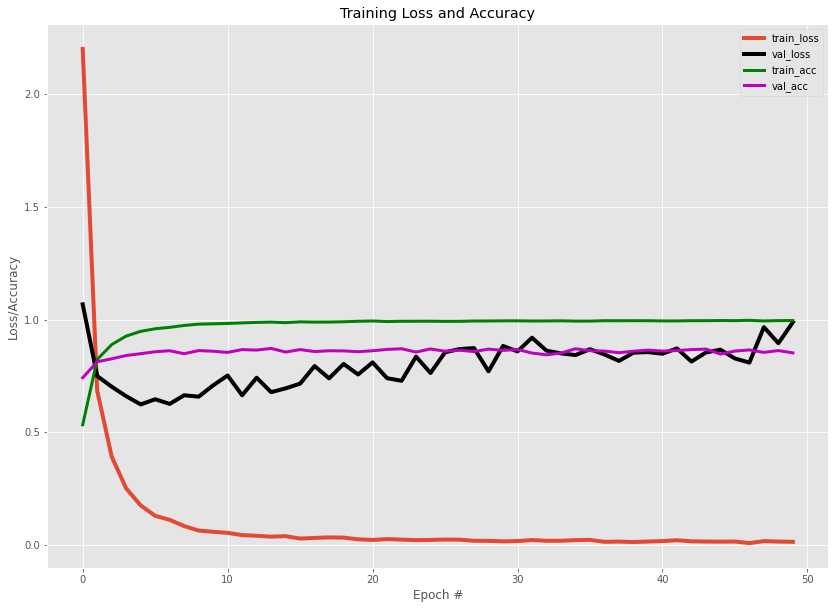

In [ ]:
## Evaluación del modelo
print("[INFO]: Evaluando el modelo...")

## Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels)) 

# Plot
plt.style.use("ggplot")
plt.figure(figsize=(14,10))
plt.plot(np.arange(0, 50), H_FTR50.history["loss"], label="train_loss", linewidth=4)
plt.plot(np.arange(0, 50), H_FTR50.history["val_loss"], label="val_loss", color='k', linewidth=4)
plt.plot(np.arange(0, 50), H_FTR50.history["accuracy"], label="train_acc", linewidth=3, color='green')
plt.plot(np.arange(0, 50), H_FTR50.history["val_accuracy"], label="val_acc", linewidth=3, color='m')
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Luego de aplicar el Fine Tuning en la arquitectura ResNet50 se alcanza un **accuracy weighted avg** del 90%, uuna leve mejora en el rendimiento de lo visto en el paso anterior.

In [ ]:
## Vemos la evaluacion del modelo comparando con los sets de test:
eval1_R50 = model.evaluate(x_test,y_test,verbose=0)
print('loss test:', round(eval1_R50[0],3))
print('accuracy test:', round(eval1_R50[1]*100,1),'%')

loss test: 0.654
accuracy test: 89.3 %


Finalmente vemos que el accuracy en test es del 89.3%, concluyendo que de las dos arquitecturas utilizadas para nuestro problema de clasificación de imágenes la arquitectura **ResNet50** es la de mejor rendimiento.

-----
### <center> **ESTRATEGIA II - Entrenar desde cero o from scratch** </center>
----

**- Creando la topología de red neuronal y entrenándola: MLP**

In [ ]:
# Imports necesarios
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
import matplotlib.pyplot as plt

In [ ]:
## Establecemos nuestra Arquitectura de red
## Usamos el modo API Sequential
model = Sequential() #(X)
model.add(Flatten()) #(X)

# Primera capa oculta
model.add(Dense(32, input_shape=(128*128*3,), activation="relu")) #(X)
model.add(Dropout(0.25))

# Segunda capa oculta
model.add(Dense(64, activation="relu")) #(X)
model.add(Dropout(0.25))

# Tercera capa oculta
model.add(Dense(128, activation="relu")) #(X)
model.add(Dropout(0.25))

# Cuarta capa oculta
model.add(Dense(256, activation="relu")) #(X)
model.add(Dropout(0.25))

# Quinta capa oculta
model.add(Dense(512, activation="relu")) #(X)

# Capa de salida
model.add(Dense(nClasses, activation="softmax")) #(X)

In [ ]:
# Compilamos el modelo y entrenamos
print("[INFO]: Entrenando red neuronal...")

print('[INFO]: Complinado el modelo...')
# Compilamos el modelo
# model.compile(loss="categorical_crossentropy", optimizer= RMSprop(learning_rate=0.001, rho=0.9, momentum=0.01, epsilon=1e-07), metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer= Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, decay=0.01,epsilon=1e-08), metrics=["accuracy"])

# Entrenamos el perceptrón multicapa
H = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=32) #(X)

[INFO]: Entrenando red neuronal...
[INFO]: Complinado el modelo...
Epoch 1/30
172/172 [==============================] - 8s 19ms/step - loss: 4.3159 - accuracy: 0.0764 - val_loss: 4.0882 - val_accuracy: 0.1888
Epoch 2/30
172/172 [==============================] - 3s 17ms/step - loss: 3.9747 - accuracy: 0.1073 - val_loss: 3.8683 - val_accuracy: 0.1873
Epoch 3/30
172/172 [==============================] - 3s 17ms/step - loss: 3.9061 - accuracy: 0.1193 - val_loss: 3.8499 - val_accuracy: 0.2238
Epoch 4/30
172/172 [==============================] - 3s 17ms/step - loss: 3.8714 - accuracy: 0.1284 - val_loss: 3.8280 - val_accuracy: 0.1990
Epoch 5/30
172/172 [==============================] - 3s 17ms/step - loss: 3.8251 - accuracy: 0.1412 - val_loss: 3.7551 - val_accuracy: 0.2325
Epoch 6/30
172/172 [==============================] - 3s 16ms/step - loss: 3.8133 - accuracy: 0.1530 - val_loss: 3.7268 - val_accuracy: 0.2318
Epoch 7/30
172/172 [==============================] - 3s 17ms/step - loss: 

Lo que hemos hecho fue crear la arquitectura a través de un Perceptron Multicapa. Vemos que resulta un modelo con muy poca capacidad de precisión tanto en entrenamiento como en validación. Esto se debe a que el MLP para problemas con imagenes no es la mejor solución. Por eso será necesario probar con una arquitectura distinta a un MLP que nos pueda otorgar un mejor rendimiento en nuestra red.

**- Creando la topología de red neuronal y entrenándola: CNN**

Recordemos que las capas convolucionales de una CNN presentan la particularidad de que las Dense Layers aprenden patrones globales y las convolucionales detectan patrones locales (resistentes a traslaciones).

Las convoluciones permiten aprender jerarquías de patrones (lineas, curvas, rectangulos, etc etc).

In [ ]:
# Import the necessary packages
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
################################################################################
###### Definimos la arquitectura Secuencial CNN  ##############################

################################################################################
################### BASE MODEL ################################################
## Definimos entradas
## dimensionalidad de las entradas: 128,128,3 hay que definirlas con la capa Input
inputs = Input(shape=(X_train.shape[1], X_train.shape[2],X_train.shape[3]))

# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs) 
x1 = BatchNormalization()(x1) 
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1) 
x1 = BatchNormalization()(x1) 
x1 = MaxPooling2D(pool_size=(2, 2))(x1) 
x1 = Dropout(0.25)(x1)                        

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1) #(X)
x2 = BatchNormalization()(x2) #(X)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2) #(X)
x2 = BatchNormalization()(x2) #(X)
x2 = MaxPooling2D(pool_size=(2, 2))(x2) #(X)
x2 = Dropout(0.25)(x2) #(X)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x3 = Conv2D(128, (3, 3), padding="same", activation="relu")(x2) #(X)
x3 = BatchNormalization()(x3) #(X)
x3 = Conv2D(128, (3, 3), padding="same", activation="relu")(x3) #(X)
x3 = BatchNormalization()(x3) #(X)
x3 = MaxPooling2D(pool_size=(2, 2))(x3) #(X)
x3 = Dropout(0.25)(x3) #(X)

# Cuarto set de capas CONV => RELU => CONV => RELU => POOL
x4 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3) #(X)
x4 = BatchNormalization()(x4) #(X)
x4 = Conv2D(256, (3, 3), padding="same", activation="relu")(x4) #(X)
x4 = MaxPooling2D(pool_size=(2, 2))(x4) #(X)

################################################################################
######################### TOP MODEL ############################################
# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x4) #(X)
xfc = Dense(512, activation="relu")(xfc) #(X)
xfc = BatchNormalization()(xfc) #(X)
xfc = Dropout(0.5)(xfc) #(X)
# Clasificador softmax
predictions = Dense(nClasses, activation="softmax")(xfc) #(X)

Con la idea de reducir dimensionalidad de manera inteligente, le estamos sumando capas de Pooling con tal fin. Para ello usamos el **MaxPooling2D** buscando reducir el numero de parámetros entrenables. La técnica de Pooling siempre se aplica sobre el mapa de activación obtenido de la capa anterior, por eso de esas activaciones me quedo con la máxima.

El tamaño del kernel elegido es de (3,3) y la función de activacion **[relu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks))**.

Recordemos que el **base model** es el paso en donde nuestra red se encarga de extraer las características más relevantes de las imágenes. A continuación se introduce el **top model** que es quien realiza la tarea de un Perceptrón Multicapa al cual se le introduce el volúmen de carateristicas resultantes del base model. Este bloque de top model será finalente el que nos permite clasificar imágenes.

Por ultimo destacamos el uso de la appi funcional en la construcción de nuestro modelo.


In [ ]:
# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
model_cnn = Model(inputs=inputs, outputs=predictions) #(X)
model_cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0     

Cuando acaba el **base model** se tendrá un tamaño de volumen de activacion de (8,8,256). Cuando se estira a traves del flatten nos quedan 16384 elementos, los cuales se conectan a una hydden layer de 512. 

El base model se refiere al extractor de características, es todo aquello que es convolucional.

Algo a considerar es que en el base model se va aumentando en filtros (potencias de 2, por ejemplo 64) y en el top model se va disminuyendo esa dimensionalidad para terminar en una capa Dense de 102 elementos que corresponden a la cantidad de unidades a clasificar.


In [ ]:
# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
model_cnn = Model(inputs=inputs, outputs=predictions) #(X)

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_cnn.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0005,decay=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=["accuracy"]) #(X)

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model_cnn.fit(X_train, Y_train, validation_split=0.2, batch_size=128, epochs=30, verbose=1) #(X)

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/30
43/43 [==============================] - 65s 662ms/step - loss: 4.0429 - accuracy: 0.2522 - val_loss: 4.7419 - val_accuracy: 0.0117
Epoch 2/30
43/43 [==============================] - 20s 456ms/step - loss: 2.5163 - accuracy: 0.4503 - val_loss: 4.9713 - val_accuracy: 0.0292
Epoch 3/30
43/43 [==============================] - 20s 456ms/step - loss: 1.9577 - accuracy: 0.5368 - val_loss: 5.4124 - val_accuracy: 0.0058
Epoch 4/30
43/43 [==============================] - 20s 455ms/step - loss: 1.6026 - accuracy: 0.6283 - val_loss: 5.8144 - val_accuracy: 0.0372
Epoch 5/30
43/43 [==============================] - 20s 457ms/step - loss: 1.3010 - accuracy: 0.7018 - val_loss: 6.0008 - val_accuracy: 0.0335
Epoch 6/30
43/43 [==============================] - 20s 455ms/step - loss: 1.0927 - accuracy: 0.7386 - val_loss: 6.0227 - val_accuracy: 0.0248
Epoch 7/30
43/43 [==============================] - 20s 457ms/step - loss: 0.9110

Vemos como se alcanza un alto accuracy en entrenamiento pero no así en validación, lo que genera buscar alternativas para mejorar la capacidad de aprendizaje del modelo en nuevas imagenes.

[INFO]: Evaluando el modelo...
                   precision    recall  f1-score   support

BACKGROUND_Google       0.42      0.32      0.36       122
            Faces       0.97      0.97      0.97        98
       Faces_easy       0.99      0.98      0.99       109
         Leopards       0.83      1.00      0.90        38
       Motorbikes       1.00      0.99      0.99       181
        accordion       0.75      0.35      0.48        17
        airplanes       0.96      0.99      0.97       211
           anchor       0.18      0.22      0.20         9
              ant       0.00      0.00      0.00         4
           barrel       0.12      0.07      0.09        14
             bass       0.25      0.25      0.25        12
           beaver       0.33      0.07      0.12        14
        binocular       1.00      0.09      0.17        11
           bonsai       0.45      0.84      0.59        32
            brain       0.79      0.35      0.49        31
     brontosaurus       

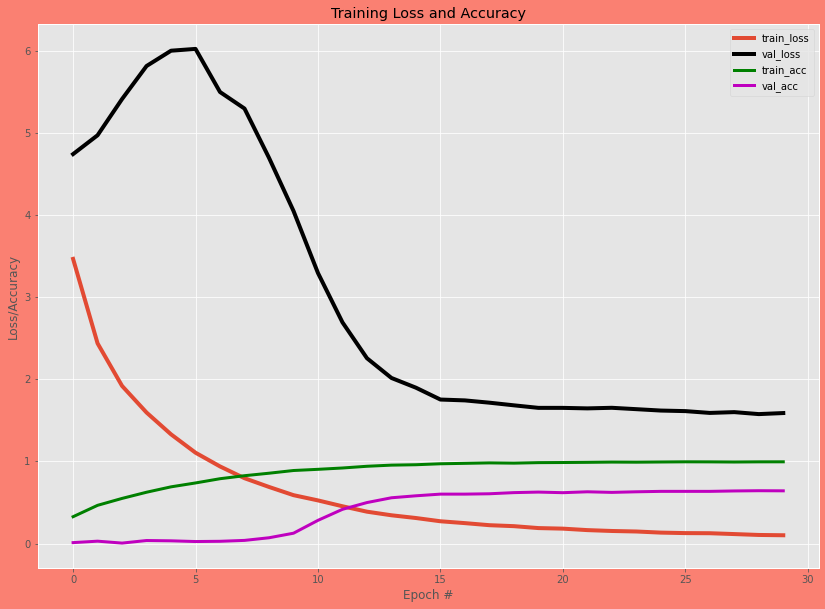

In [ ]:
## Evaluación del modelo
print("[INFO]: Evaluando el modelo...")

## Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_cnn.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels)) 

# Plot
plt.style.use("ggplot")
plt.figure(figsize=(14,10),facecolor='Salmon')
plt.plot(np.arange(0, 30), H.history["loss"], label="train_loss", linewidth=4)
plt.plot(np.arange(0, 30), H.history["val_loss"], label="val_loss", color='k', linewidth=4)
plt.plot(np.arange(0, 30), H.history["accuracy"], label="train_acc", linewidth=3, color='green')
plt.plot(np.arange(0, 30), H.history["val_accuracy"], label="val_acc", linewidth=3, color='m')
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
## Vemos la evaluacion del modelo comparando con los sets de test:
eval_cnn = model_cnn.evaluate(x_test,y_test,verbose=0)
print('loss test:', round(eval_cnn[0],3))
print('accuracy test:', round(eval_cnn[1]*100,1),'%')

loss test: 1.67
accuracy test: 63.5 %


Con la arquitectura seleccionada llegamos a un 63.5% de accuracy en test y un marcado overfitting.

Con la idea de reducir el overfitting vamos a utilizar penalizadores que permitan optimizar la red. Desde keras regularizer veremos el uso de los regularizadores l1 y l2.

In [ ]:
from keras.regularizers import l2
from keras.regularizers import l1

In [ ]:
################################################################################
###### Definimos la arquitectura Secuencial CNN  ##############################

################################################################################
################### BASE MODEL ################################################
## Definimos entradas
## dimensionalidad de las entradas: 128,128,3 hay que definirlas con la capa Input
inputs = Input(shape=(X_train.shape[1], X_train.shape[2],X_train.shape[3]))

# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(64, (3, 3),kernel_regularizer=l1(0.0001),bias_regularizer=l2(0.0001) ,padding="same", activation="relu")(inputs) 
x1 = BatchNormalization()(x1) 
x1 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1) 
x1 = BatchNormalization()(x1) 
x1 = MaxPooling2D(pool_size=(2, 2))(x1) 
                     

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(128, (3, 3),kernel_regularizer=l2(0.0001),bias_regularizer=l2(0.0001) ,padding="same", activation="relu")(x1) #(X)
x2 = BatchNormalization()(x2) #(X)
x2 = Conv2D(128, (3, 3), padding="same", activation="relu")(x2) #(X)
x2 = BatchNormalization()(x2) #(X)
x2 = MaxPooling2D(pool_size=(2, 2))(x2) #(X)


# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x3 = Conv2D(256, (3, 3),kernel_regularizer=l2(0.0001),bias_regularizer=l2(0.0001),padding="same", activation="relu")(x2) #(X)
x3 = BatchNormalization()(x3) #(X)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3) #(X)
x3 = BatchNormalization()(x3) #(X)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3) #(X)
x3 = MaxPooling2D(pool_size=(2, 2))(x3) #(X)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3) #(X)


# Cuarto set de capas CONV => RELU => CONV => RELU => POOL
x4 = Conv2D(512, (3,3) ,padding="same", activation="relu")(x3) #(X)
x4 = BatchNormalization()(x4) #(X)
x4 = Conv2D(512, (3, 3), padding="same", activation="relu")(x4) #(X)
x4 = BatchNormalization()(x4) #(X)
x4 = Conv2D(512, (3, 3), padding="same", activation="relu")(x4) #(X)
x4 = MaxPooling2D(pool_size=(2, 2))(x4) #(X)
x4 = Dropout(0.5)(x4)

# Quinto set de capas CONV => RELU => CONV => RELU => POOL
x5 = Conv2D(1024, (3, 3),padding="same", activation="relu")(x4) #(X)
x5 = BatchNormalization()(x5) #(X)
x5 = Conv2D(1024, (3, 3), padding="same", activation="relu")(x5) #(X)
x5 = BatchNormalization()(x5) #(X)
x5 = Conv2D(1024, (3, 3), padding="same", activation="relu")(x5) #(X)
x5 = MaxPooling2D(pool_size=(2, 2))(x5) #(X)
x5 = Dropout(0.5)(x5)

################################################################################
######################### TOP MODEL ############################################
# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x5) #(X)
xfc = Dense(512, activation="relu")(xfc) #(X)
xfc = BatchNormalization()(xfc) #(X)
xfc = Dropout(0.5)(xfc) #(X)
# Clasificador softmax
predictions = Dense(nClasses, activation="softmax")(xfc) #(X)

In [ ]:
# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
model_cnn_r = Model(inputs=inputs, outputs=predictions) #(X)

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
# model_cnn_r.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.000005,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-07), metrics=["accuracy"]) #(X)
model_cnn_r.compile(loss="categorical_crossentropy", optimizer=RMSprop(learning_rate=0.0005,rho=0.9,momentum=0.01,epsilon=1e-08), metrics=["accuracy"]) #(X)


# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model_cnn_r.fit(X_train, Y_train, validation_split=0.2, batch_size=128, epochs=50, verbose=1) #(X)

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/50
43/43 [==============================] - 117s 2s/step - loss: 4.5306 - accuracy: 0.1800 - val_loss: 5.3952 - val_accuracy: 0.0058
Epoch 2/50
43/43 [==============================] - 60s 1s/step - loss: 3.2591 - accuracy: 0.3277 - val_loss: 18.6019 - val_accuracy: 0.0036
Epoch 3/50
43/43 [==============================] - 60s 1s/step - loss: 2.8333 - accuracy: 0.3871 - val_loss: 8.0105 - val_accuracy: 0.0940
Epoch 4/50
43/43 [==============================] - 60s 1s/step - loss: 2.3589 - accuracy: 0.4533 - val_loss: 6.5309 - val_accuracy: 0.0743
Epoch 5/50
43/43 [==============================] - 60s 1s/step - loss: 2.0301 - accuracy: 0.5251 - val_loss: 5.6947 - val_accuracy: 0.0809
Epoch 6/50
43/43 [==============================] - 60s 1s/step - loss: 1.7606 - accuracy: 0.5838 - val_loss: 4.7126 - val_accuracy: 0.1567
Epoch 7/50
43/43 [==============================] - 60s 1s/step - loss: 1.4942 - accuracy: 0.6392

Lo que podemos ver luego del entrenamiento de la red es que se alcanza un alto accuracy en training y un bajo error en cercanias de cero, pero no tan así en la etapa de validación. 

[INFO]: Evaluando el modelo...
                   precision    recall  f1-score   support

BACKGROUND_Google       0.61      0.34      0.43       122
            Faces       0.93      0.99      0.96        98
       Faces_easy       0.99      0.98      0.99       109
         Leopards       0.83      1.00      0.90        38
       Motorbikes       0.99      0.99      0.99       181
        accordion       0.84      0.94      0.89        17
        airplanes       0.91      0.99      0.95       211
           anchor       0.44      0.44      0.44         9
              ant       0.67      0.50      0.57         4
           barrel       0.36      0.29      0.32        14
             bass       0.28      0.42      0.33        12
           beaver       0.23      0.21      0.22        14
        binocular       0.60      0.27      0.37        11
           bonsai       0.57      0.62      0.60        32
            brain       0.80      0.52      0.63        31
     brontosaurus       

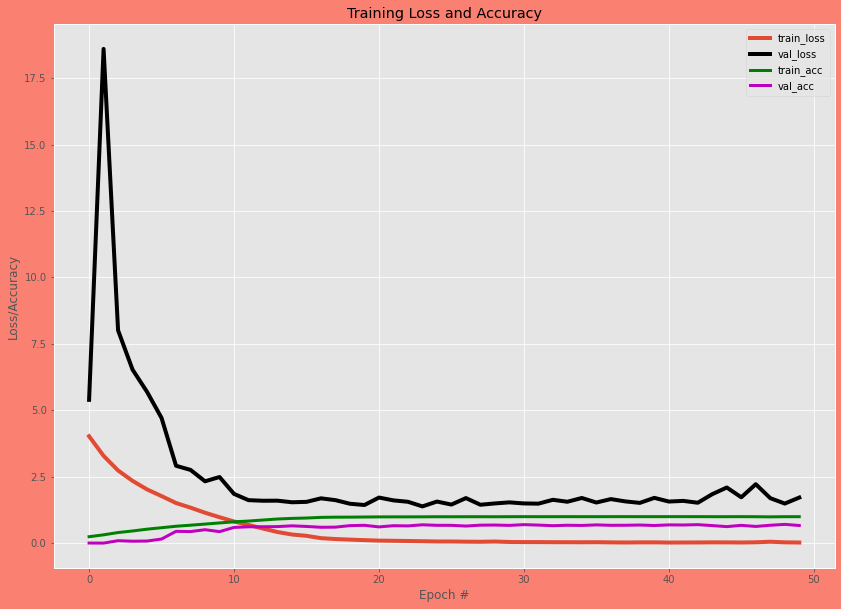

In [ ]:
## Evaluación del modelo
print("[INFO]: Evaluando el modelo...")

## Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_cnn_r.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels)) 

# Plot
plt.style.use("ggplot")
plt.figure(figsize=(14,10),facecolor='Salmon')
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss", linewidth=4)
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss", color='k', linewidth=4)
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc", linewidth=3, color='green')
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc", linewidth=3, color='m')
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
## Vemos la evaluacion del modelo comparando con los sets de test:
eval_cnnr = model_cnn_r.evaluate(x_test,y_test,verbose=0)
print('loss test:', round(eval_cnnr[0],3))
print('accuracy test:', round(eval_cnnr[1]*100,1),'%')

loss test: 1.706
accuracy test: 68.0 %


Finalmente con la introducción del regularizador l1 se logra reducir un poco la tendencia de overfitting y se llega a un accuracy del 68% en test.

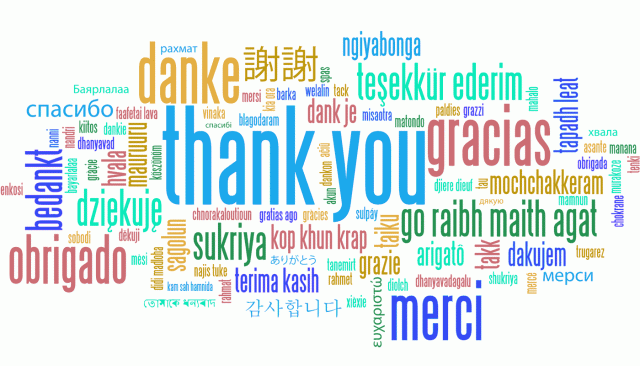